In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras import models
from IPython import display

from vpt.features.features import *
import vpt.utils.image_processing as ip
import vpt.settings as s

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [8]:
def generate_hand_data(fs, hd, annotations, show=False):

    X_lh = []
    y_lh = []

    X_rh = []
    y_rh = []

    filenames = []

    hg = HandGenerator(fs, hd, annotations)
    
    hgen = hg.hand_generator(debug=False)
    init_show = False
    for lh, rh in hgen:
        if lh.label() != None and rh.label() != None:
            
            # display
            if show:
                if not init_show:
                    plt.figure(figsize=(12,4))
                    plt.subplot(121)
                    disp_lh = plt.imshow(lh.get_hand_img())
                    
                    plt.subplot(122)
                    disp_rh = plt.imshow(rh.get_hand_img())
                    
                    init_show = True
                else:
                    print(lh.get_fpath())
                    disp_lh.set_data(lh.get_hand_img())
                    disp_rh.set_data(rh.get_hand_img())
                    plt.draw()
                    
                    display.clear_output(wait=True)
                    display.display(plt.gcf())
                    print(lh.get_fpath())
                    plt.pause(0.001)
            
            filenames.append(lh.get_fpath())
            
            y_lh.append(lh.label())
            X_lh.append(lh.get_hand_img())
            
            y_rh.append(rh.label())
            X_rh.append(rh.get_hand_img())
            
        else:
            raise RuntimeWarning("Warning: No label found for hands")

    X_lh = np.array(X_lh)
    y_lh = np.array(y_lh)
    filenames = np.array(filenames)
    
    return X_lh, y_lh, X_rh, y_rh, filenames

In [3]:
# Initialize Data Loading Parameters
s.participant = "all"
s.sensor = "realsense"
s.note = "all_data_12_07"

ftype = "bin"
folder = "data/posture/all/"
annotation_file = "data/posture/all/annotations.txt"

# RDF Parameters
refreshHD = False
M = 3
radius = .3
n_samples = 500
segmentation_model_path = "data/rdf/trainedmodels/{}_M{}_rad{:0.1f}".format(s.participant, M, radius)

# Posture Parameters
feature_type = "cae"

In [4]:
annotations = load_annotations(annotation_file, debug=False)
fs = FileStream(folder, ftype=ftype, annotations=annotations, ignore=True)
rdf_hs = load_hs_model(s.participant, M, radius, n_samples , refreshHD, segmentation_model_path)

hd = HandDetector(rdf_hs)

Key Error: Key '/p1b/001123' doesn't exist in annotations
Key Error: Key '/p1b/001124' doesn't exist in annotations
Key Error: Key '/p1b/001125' doesn't exist in annotations
Key Error: Key '/p1b/001126' doesn't exist in annotations
Key Error: Key '/p4d/000635' doesn't exist in annotations
Key Error: Key '/p4d/000636' doesn't exist in annotations
Key Error: Key '/p4d/000637' doesn't exist in annotations
Key Error: Key '/p4d/000638' doesn't exist in annotations
Key Error: Key '/p4d/000639' doesn't exist in annotations
Key Error: Key '/p4e/000417' doesn't exist in annotations
Key Error: Key '/p4e/000418' doesn't exist in annotations
Key Error: Key '/p4e/000419' doesn't exist in annotations
Key Error: Key '/p4e/000420' doesn't exist in annotations
Key Error: Key '/p5a/000050' doesn't exist in annotations
Key Error: Key '/p5e/000747' doesn't exist in annotations
Key Error: Key '/p5s/000050' doesn't exist in annotations
Key Error: Key '/p5s/000051' doesn't exist in annotations
Key Error: Key

Key Error: Key '/p5s/001069' doesn't exist in annotations
Key Error: Key '/p5s/001070' doesn't exist in annotations
Key Error: Key '/p5s/001071' doesn't exist in annotations
Key Error: Key '/p5s/001072' doesn't exist in annotations
Key Error: Key '/p5s/001073' doesn't exist in annotations
Key Error: Key '/p5s/001074' doesn't exist in annotations
Key Error: Key '/p5s/001075' doesn't exist in annotations
Key Error: Key '/p5s/001076' doesn't exist in annotations
Key Error: Key '/p5s/001077' doesn't exist in annotations
Key Error: Key '/p5s/001078' doesn't exist in annotations
Key Error: Key '/p5s/001079' doesn't exist in annotations
Key Error: Key '/p5s/001080' doesn't exist in annotations
Key Error: Key '/p5s/001081' doesn't exist in annotations
Key Error: Key '/p5s/001082' doesn't exist in annotations
Key Error: Key '/p5s/001083' doesn't exist in annotations
Key Error: Key '/p5s/001084' doesn't exist in annotations
Key Error: Key '/p5s/001085' doesn't exist in annotations
Key Error: Key

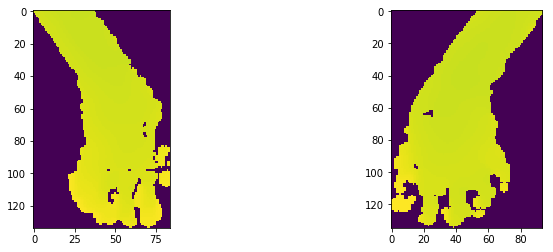

In [ ]:
X_lh, y_lh, X_rh, y_rh, filenames = generate_hand_data(fs, hd, annotations, show=True)